# Employee Turnover Analytics

**Aim of the project**:

A comprehensive analysis of employee turnover using various data preprocessing techniques, exploratory data analysis, machine learning models, and retention strategy suggestions.

## Project statement:
1. Perform data quality check by checking for missing values if any.
2. Understand what factors contirubted most to employee turnover by EDA.
3. Perform clustering of Employees who left based on their satisfaction and evaluation.
4. Handle the left Class Imbalance using SMOTE technique.
5. Perform k-fold cross-validation model training and evaluate performance.
6. Identify the best model and justify the evalution metrics used.
7. Suggest various retention strategies for targeted employees.

### 1. Data preprocessing

This step involves the importing required libraries, data loading, data qualitiy check, renaming the columns and exploring the data types. The missing values and outliers are dealt within this step. This step makes the data ready to apply further analysis and visualization. 

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the dataset
df = pd.read_excel("E:\\IITK_AI_ML\\Course_4\\1688640705_hr_comma_sep.xlsx")

In [3]:
#making copy of dataset
df1 = df.copy()

In [4]:
#get to know the dataset
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df1.shape #dimension of dataset i.e.,number of total data entries and features

(14999, 10)

In [6]:
#checking for any missing or null values in dataset
df1.isnull().sum() #no missing or null values are there

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [7]:
df1.info() #checking datatypes of a feature columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [8]:
df1.columns.str.capitalize() #capitalizing the name of features

Index(['Satisfaction_level', 'Last_evaluation', 'Number_project',
       'Average_montly_hours', 'Time_spend_company', 'Work_accident', 'Left',
       'Promotion_last_5years', 'Sales', 'Salary'],
      dtype='object')

In [9]:
df1 = df1.rename(columns={'average_montly_hours':'avg_monthly_hours', 'sales': 'Department'})

In [46]:
df1['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [10]:
#cheking for duplicates
dup = df1.duplicated().sum()
dup

3008

In [11]:
dup_row = df1[df1.duplicated()]
print('Duplicate rows:')
print(dup_row)

Duplicate rows:
       satisfaction_level  last_evaluation  number_project  avg_monthly_hours  \
396                  0.46             0.57               2                139   
866                  0.41             0.46               2                128   
1317                 0.37             0.51               2                127   
1368                 0.41             0.52               2                132   
1461                 0.42             0.53               2                142   
...                   ...              ...             ...                ...   
14994                0.40             0.57               2                151   
14995                0.37             0.48               2                160   
14996                0.37             0.53               2                143   
14997                0.11             0.96               6                280   
14998                0.37             0.52               2                158   

       time

In [12]:
#drop the duplicates 
df1 = df1.drop_duplicates()

In [13]:
#cheking the shape of final dataset
df1.shape

(11991, 10)

### 2. EDA

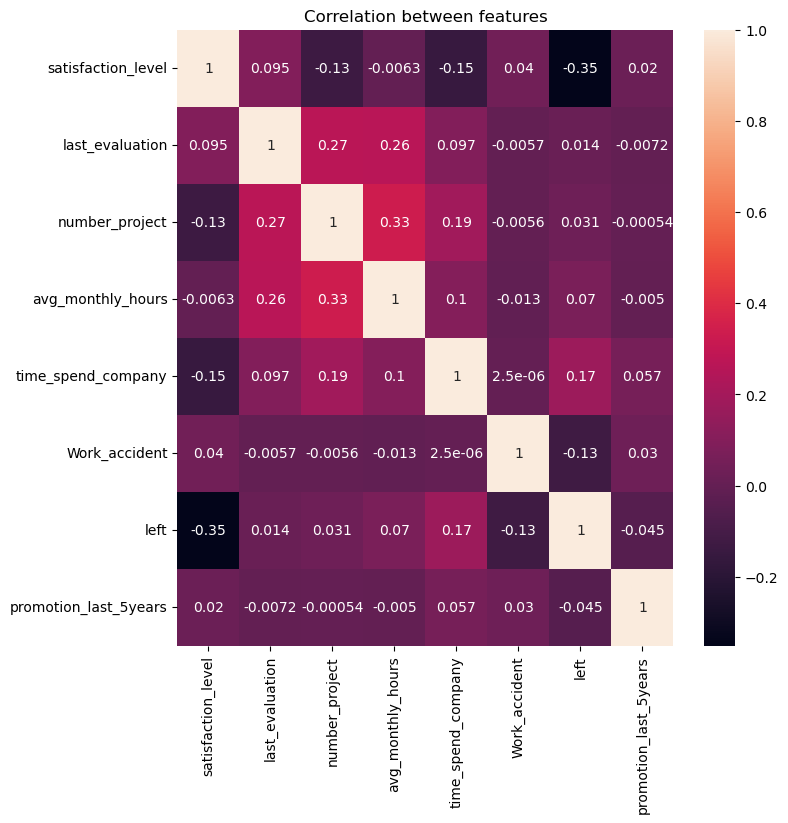

In [14]:
#finding correlation between features to understand factors contributed to employee turnover
plt.figure(figsize = (8,8))
sns.heatmap(df1.corr(), annot=True)
plt.title("Correlation between features")
plt.show()

#### Insights from the correlation:
1. last_evaluation is 35% positively correlated with number_projects and 34% positively with average_monthly_hours.
2. number_project is positively correlated 35% with last_evaluation and 42% with average_monthly_hours.
3. left (employee) have positive correlation with last_evaluation, number_project, avg_monthly_hours, time_spend_company and negative correlation with satisfaction_level, Work_accident and promotion_last_5years.

These correlation heatmap provides information about important features or factors contributing to employee turnover. 

> Higher evaluations, involvement in more projects and longer monthly hours may be associated with **lower turnover rates**. 

> Dissatisfaction, lack of promotions, and involvement in work accidents may be potential indicators of **higher turnover rates**.

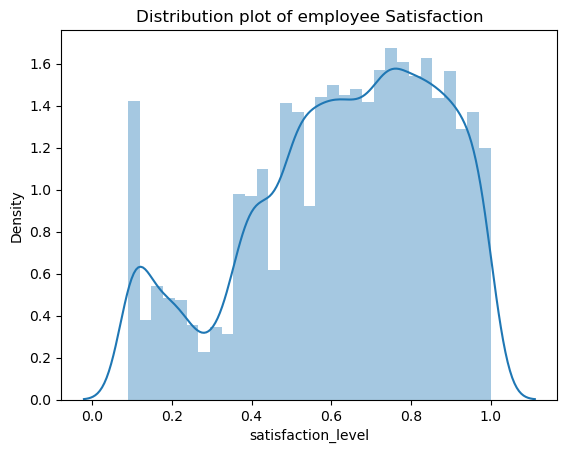

In [15]:
#distribution plot of employee satisfaction 
sns.distplot(df1['satisfaction_level'])
plt.title('Distribution plot of employee Satisfaction')
plt.show()

**Observation**
1. The distribution of employee satisfaction levels is skewed towards higher satisfaction.
2. Most of the employees have high satisfaction.
3. Few employees have low satisfaction level.

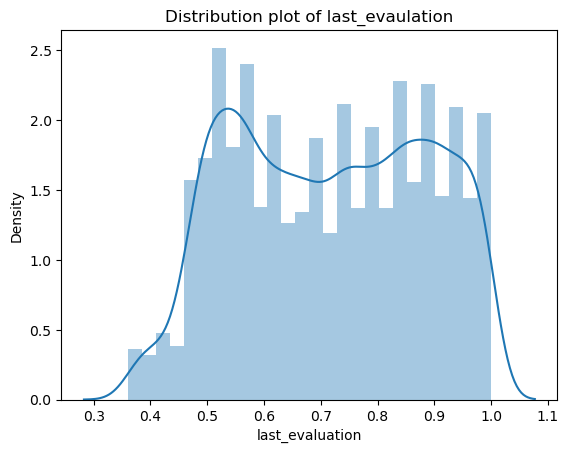

In [16]:
#distribution plot of employee evaluation
sns.distplot(df1['last_evaluation'])
plt.title('Distribution plot of last_evaulation')
plt.show()

**Observation**
1. It shows binomial distribution, with two distinct peaks in histogram and the density curve. 
2. First peak located at 0.5 to 0.8 on x-axis, shows a group of employee received relatively **high evaluation scores**. 
3. Second peak located at 0.2 to 0.4 on x-axis, shows a group of employee recieved relatively **low evaluation scores**.

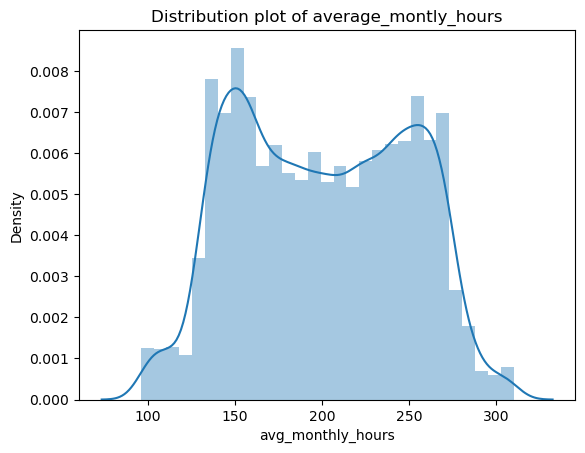

In [17]:
#distribution plot of employee average monthly hours
sns.distplot(df1['avg_monthly_hours'])
plt.title('Distribution plot of average_montly_hours')
plt.show()

**Observations**
1. It shows mainly three clusters of employees based on the average number of hours work in a month. 
2. It shows peaks at around 100,150 and 280 avg.hours spend in month.
3. While some employees work closer to lower end of distribution (around 100 hours), many work longer hours (around 150-280).
4. Density curved provides the smoothed representation of the peaks and valleys of the overall shape and pattern more clearly. 

In [18]:
total_emp = len(df1)

#employee stayed
emp_stayed = df1['number_project'].value_counts()
print('\nempployee_stayed', emp_stayed)
per_empstayed = (emp_stayed/total_emp)*100
print("\npercentage of employee stayed:", per_empstayed.round(2))

#employee left
emp_left = df1['left'].value_counts()
print('\nemployee_left', emp_left)
per_empleft = (emp_left/total_emp)*100 
print("\npercentage of employee who left:", per_empleft.round(2))


empployee_stayed 4    3685
3    3520
5    2233
2    1582
6     826
7     145
Name: number_project, dtype: int64

percentage of employee stayed: 4    30.73
3    29.36
5    18.62
2    13.19
6     6.89
7     1.21
Name: number_project, dtype: float64

employee_left 0    10000
1     1991
Name: left, dtype: int64

percentage of employee who left: 0    83.4
1    16.6
Name: left, dtype: float64


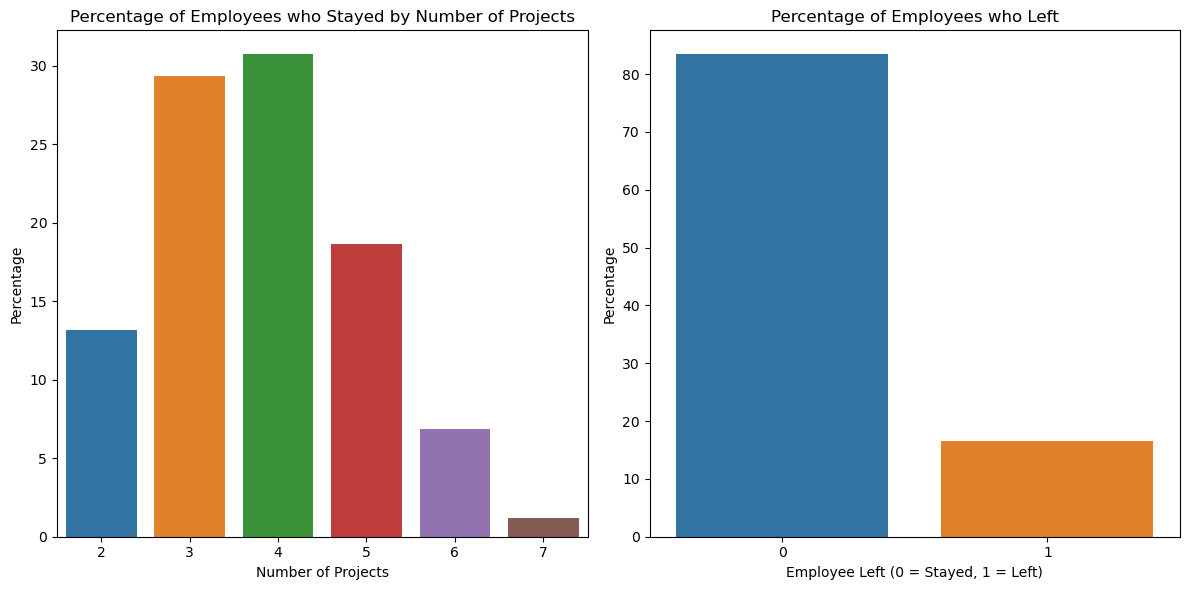

In [19]:
# Create a figure and axis objects
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot for employees who stayed
sns.barplot(x=emp_stayed.index, y=per_empstayed, ax=axes[0])
axes[0].set_title('Percentage of Employees who Stayed by Number of Projects')
axes[0].set_xlabel('Number of Projects')
axes[0].set_ylabel('Percentage')

# Plot for employees who left
sns.barplot(x=emp_left.index, y=per_empleft, ax=axes[1])
axes[1].set_title('Percentage of Employees who Left')
axes[1].set_xlabel('Employee Left (0 = Stayed, 1 = Left)')
axes[1].set_ylabel('Percentage')

# Show plot
plt.tight_layout()
plt.show()


**Observations**
> 1. **Percentage of employees who stayed by Number of projects**
- there are 2 to 7 projects assighned to employee
- tallest bar corrsponds to employees who were involved in 4 projects, representing 30% of total employees who stayed

>2. **Perentage of employees who left**
- '0' indicates emplooyees who stayed in the company, while '1' represents employee who left
- it appears that a larger proportion of employees stayed in the company compared to those who left, as evidenced by the height discrepancy between two bars.

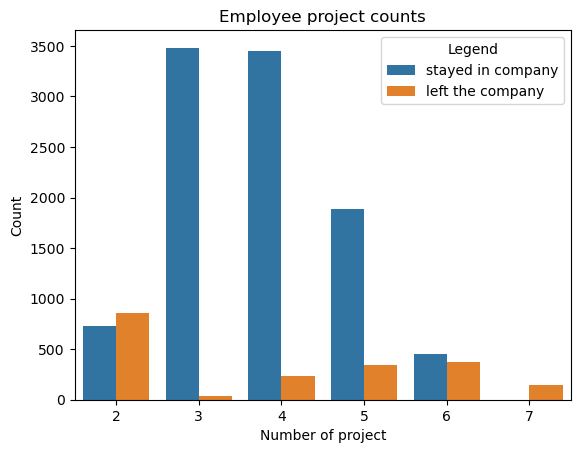

In [20]:
sns.countplot(x='number_project', hue= 'left', data = df1)
plt.title('Employee project counts')
plt.xlabel('Number of project')
plt.ylabel('Count')
plt.legend(title = 'Legend', labels=['stayed in company', 'left the company'])
plt.show()

### 3. Clustering of Employees
Based on the satisfaction and evaluation

In [21]:
from sklearn.cluster import KMeans

left_emp = df1[df1['left']==1][['satisfaction_level', 'last_evaluation']]

kmeans = KMeans(n_clusters = 3, random_state = 42)
kmeans.fit(left_emp)

left_emp['cluster']= kmeans.labels_

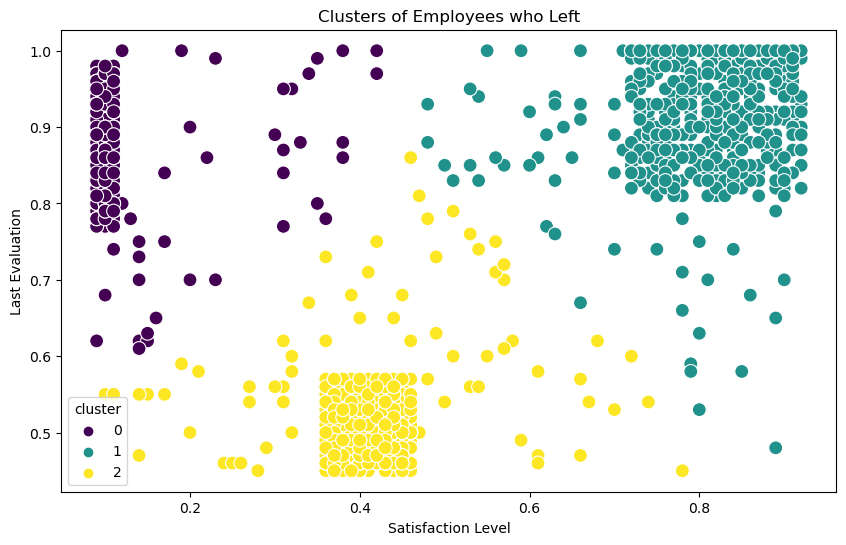

In [22]:
plt.figure(figsize =(10,6))
sns.scatterplot(x='satisfaction_level', y='last_evaluation', hue = 'cluster', data = left_emp, palette = 'viridis', s= 100)
plt.title('Clusters of Employees who Left')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.show()

**Observations**
- each point of the plot represents an employee who left the company, with different colors indicating the cluster to which they belong.
- three clusters are identified and differentiated by colors: purple, yellow and teal
- *Teal color* : Employee characterized by **low satisfaction level** and **high last evaluation score**
- *Yellow color* : Employee characterized by **high satisfaction level** and **high last evaluation scores**
- *purple color* : Employee characterized with **moderate satisfaction levels** and **moderate to high last evaluation scores**

### 4. Left class imbalance using SMOTE 


In [23]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [24]:
cat_col = df1.select_dtypes(include=['object']).columns
num_col = df1.select_dtypes(include=['int64','float64']).columns

In [25]:
df_cat = pd.get_dummies(df1[cat_col], drop_first = True)
df_num = pd.concat([df1[num_col], df_cat], axis=1)

In [26]:
X = df_num.drop('left', axis = 1)
y = df_num['left']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, stratify =y, random_state=123)
smote = SMOTE(random_state=123)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [27]:
print('Class distribution after SMOTE:')
print(y_train_resampled.value_counts())

Class distribution after SMOTE:
0    7999
1    7999
Name: left, dtype: int64


### 5. Perfrom 5-fold cross-validation model training and evaluation 


**Logistic regression model**

In [28]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [29]:
log_reg = LogisticRegression()

In [30]:
log_reg_cv_predictions = cross_val_predict(log_reg, X_train_resampled, y_train_resampled, cv=5)


In [31]:
log_reg_classification_report = classification_report(y_train_resampled, log_reg_cv_predictions)
print(log_reg_classification_report)

              precision    recall  f1-score   support

           0       0.83      0.80      0.82      7999
           1       0.81      0.84      0.82      7999

    accuracy                           0.82     15998
   macro avg       0.82      0.82      0.82     15998
weighted avg       0.82      0.82      0.82     15998



**Random Forest Classifier**

In [32]:
from sklearn.ensemble import RandomForestClassifier
# Initialize Random Forest Classifier model
rf_classifier = RandomForestClassifier()

In [33]:
# Perform 5-fold cross-validation
rf_cv_predictions = cross_val_predict(rf_classifier, X_train_resampled, y_train_resampled, cv=5)

# Generate classification report
rf_classification_report = classification_report(y_train_resampled, rf_cv_predictions)
print(rf_classification_report)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      7999
           1       0.99      0.96      0.97      7999

    accuracy                           0.97     15998
   macro avg       0.97      0.97      0.97     15998
weighted avg       0.97      0.97      0.97     15998



**Gradient Boosting Classifier**

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting Classifier model
gb_classifier = GradientBoostingClassifier()

In [35]:
#Perform 5-fold cross-validation
gb_cv_predictions = cross_val_predict(gb_classifier, X_train_resampled, y_train_resampled, cv=5)

# Generate classification report
gb_classification_report = classification_report(y_train_resampled, gb_cv_predictions)
print(gb_classification_report)

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      7999
           1       0.97      0.94      0.96      7999

    accuracy                           0.96     15998
   macro avg       0.96      0.96      0.96     15998
weighted avg       0.96      0.96      0.96     15998



### 6. Identify the Best Model and Justify the Evaluation Metrics Used 


**ROC/AUC for each model and plot the ROC curve**

In [36]:
from sklearn.metrics import roc_auc_score, roc_curve

In [37]:
# Initialize models
models = [log_reg, rf_classifier, gb_classifier]
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']

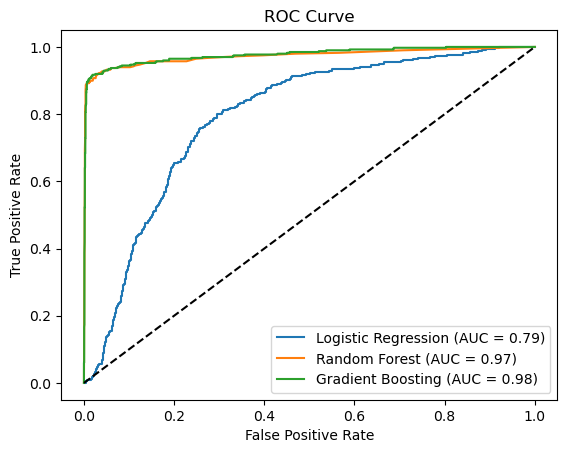

In [38]:
# Iterate over models
for model, name in zip(models, model_names):
    model.fit(X_train_resampled, y_train_resampled)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Observations**
1. ROC curve plots the trade-off between sensitivity and specificity i.e., **True positivie rate** and **False positive rate**, respectively.
2. AUC for **Gradient Boosting** is high i.e., 0.98. 

**Confusion matrix**

In [39]:
from sklearn.metrics import confusion_matrix

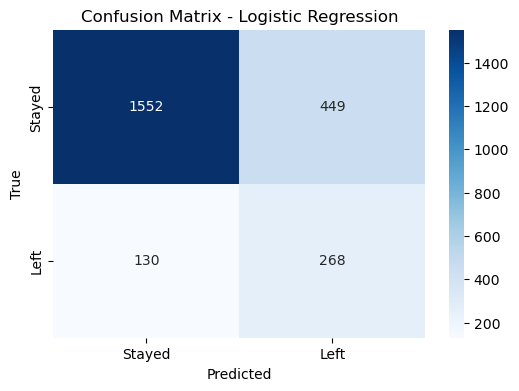

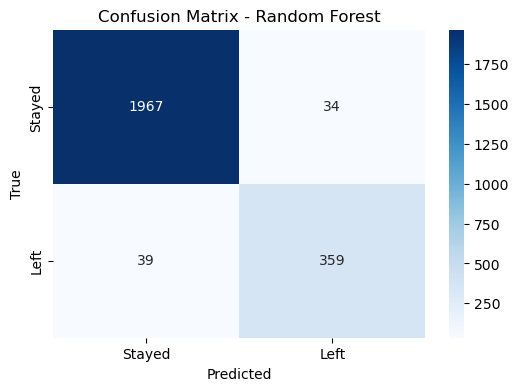

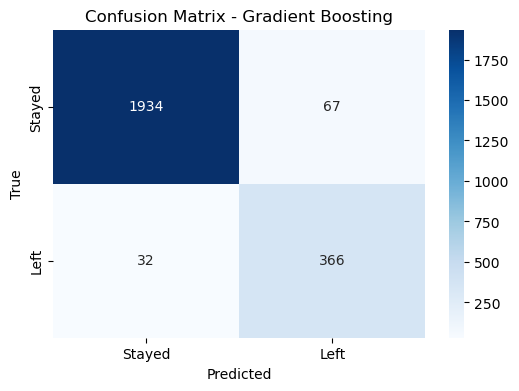

In [40]:
for model, name in zip(models, model_names):
    # Fit the model
    model.fit(X_train_resampled, y_train_resampled)
    
    # Predict on the test data
    y_pred = model.predict(X_test)
    
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

### 7. Suggest Various Retention Strategies for Targeted Employees

**From the observations, the best-performing model is Gradient Boosting.** 
We have already trained and test data for the Gradient Boosting. 

In [41]:
probabilities = gb_classifier.predict_proba(X_test)[:,1]

In [42]:
print(probabilities)

[0.28009381 0.58673967 0.03777986 ... 0.00928004 0.04255763 0.0306232 ]


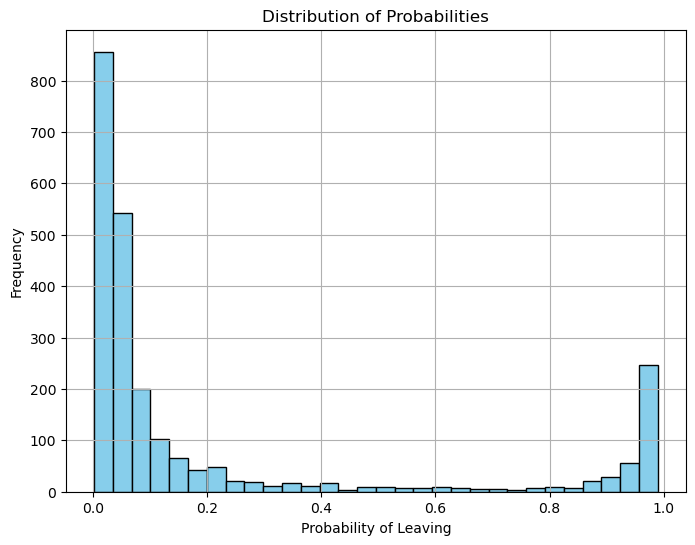

In [53]:
import matplotlib.pyplot as plt

# Plot the distribution of probabilities
plt.figure(figsize=(8, 6))
plt.hist(probabilities, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Probability of Leaving')
plt.ylabel('Frequency')
plt.title('Distribution of Probabilities')
plt.grid(True)
plt.show()


**Observations**
1. Majority of the employees have low probabilities of leaving, as indicated by taller bars on the left side.
2. At higher probabilities, the frequency of employees decreaases, leading to shorter bars on the right side of the plot.


**Categorize Employees into Risk Zones**

In [43]:
thresholds ={
    'Safe Zone':0.2,
    'Low Risk Zone':0.6,
    'Medium Risk Zone':0.9,
    'High Risk Zone':1.0
}

risk_zones = []

for p in probabilities:
    if p < thresholds['Safe Zone']:
        risk_zones.append('Safe Zone')
    elif thresholds['Safe Zone'] <= p < thresholds['Low Risk Zone']:
        risk_zones.append('Low Risk Zone')
    elif thresholds['Low Risk Zone'] <= p < thresholds['Medium Risk Zone']:
        risk_zones.append('Medium Risk Zone')
    else:
        risk_zones.append('High Risk Zone')

In [44]:
# Add the risk zones to the test data as a new column
test_data_with_risk_zones = X_test.copy()
test_data_with_risk_zones['Risk Zone'] = risk_zones


**Propose appropriate retention strategies tailored to each zone**

In [52]:
print({'Safe Zone\n':'Retention strategies could focus on recognition, rewards, and career development to maintain high satisfaction levels.'})
print({'Low Risk Zone\n':'Retention strategies could include regular check-ins, opportunities for skill development, and providing a positive work environment.'})
print({'Medium Risk Zone\n':'Retention strategies may involve addressing specific concerns, conducting stay interviews, and offering promotions or transfers to increase engagement.'})
print({'High Risk Zone\n':'Urgent intervention may be needed, such as addressing workload issues, improving communication, and offering retention bonuses or special incentives.'})

{'Safe Zone\n': 'Retention strategies could focus on recognition, rewards, and career development to maintain high satisfaction levels.'}
{'Low Risk Zone\n': 'Retention strategies could include regular check-ins, opportunities for skill development, and providing a positive work environment.'}
{'Medium Risk Zone\n': 'Retention strategies may involve addressing specific concerns, conducting stay interviews, and offering promotions or transfers to increase engagement.'}
{'High Risk Zone\n': 'Urgent intervention may be needed, such as addressing workload issues, improving communication, and offering retention bonuses or special incentives.'}
